In [1]:
def de_bruijn_ize(st, k):
    """ Return a list holding, for each k-mer, its left k-1-mer and its right k-1-mer in a pair """

    # The string 'st' = DNA sequence 
    # 'k' = length of the k-mers (subsequences)
    
    # 'edges' = store the connections in our graph.
    # Each edge = a k-mer from the DNA sequence.
    edges = []
    
    # 'nodes' = (k-1)-mers
    #  set is used because each (k-1)-mer should only appear once as a node.
    nodes = set()
    
    # 'i' = starting position of each k-mer.
    # The range ensures we stop at the last possible starting position for a k-mer.
    for i in range(len(st) - k + 1):
        
        # Extracting k-mer from the sequence.
        k_mer = st[i:i+k]
        
        # left k-1-mer is the prefix of the k-mer (starting node of our edge in the De Bruijn graph).
        left_k1_mer = st[i:i+k-1]
        
        # right k-1-mer is the suffix of the k-mer (ending node of our edge).
        right_k1_mer = st[i+1:i+k]
        
        # This edge represents the k-mer, connecting its prefix to its suffix.
        edges.append((left_k1_mer, right_k1_mer))
        
        # add both the prefix and suffix to our set of nodes.
        nodes.add(left_k1_mer)
        nodes.add(right_k1_mer)
        
    # This function returns the set of all unique nodes and the list of all edges.
    # these two components are then used to build the complete graph from all the reads.
    # then find an Eulerian path to reconstruct the full genome sequence.
    return nodes, edges

{'AC', 'CG', 'GC', 'GT', 'TC'}

In [5]:
nodes, edges = de_bruijn_ize("AAGCTGCTGAGCTGGGCTAG", 3)

In [6]:
nodes

{'AA', 'AG', 'CT', 'GA', 'GC', 'GG', 'TA', 'TG'}

In [7]:
edges

[('AA', 'AG'),
 ('AG', 'GC'),
 ('GC', 'CT'),
 ('CT', 'TG'),
 ('TG', 'GC'),
 ('GC', 'CT'),
 ('CT', 'TG'),
 ('TG', 'GA'),
 ('GA', 'AG'),
 ('AG', 'GC'),
 ('GC', 'CT'),
 ('CT', 'TG'),
 ('TG', 'GG'),
 ('GG', 'GG'),
 ('GG', 'GC'),
 ('GC', 'CT'),
 ('CT', 'TA'),
 ('TA', 'AG')]

In [8]:
def visualize_de_bruijn(st, k):
    """ Visualize a directed multigraph using graphviz """
    
    # used to create a visualization of the De Bruijn graph.

    nodes, edges = de_bruijn_ize(st, k)
    
    # 'dot_str' = graph description in DOT language (format used by the Graphviz visualization tool.)
    dot_str = 'digraph "DeBruijn graph" {\n'
    
    # For each node, this loop adds a line to the DOT string that defines the node's label.
    for node in nodes:
        dot_str += '  %s [label="%s"] ;\n' % (node, node)

    # For each edge (k-mer), it adds a line to the DOT string to define a directed connection.
    for src, dst in edges:
        dot_str += '  %s -> %s ;\n' % (src, dst)
        
    return dot_str + '}\n'

In [9]:
%load_ext gvmagic

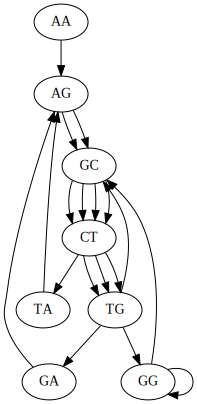

In [10]:
%dotstr visualize_de_bruijn("AAGCTGCTGAGCTGGGCTAG", 3)